## RQ1: When was safetensors beginning to be applied/used? 
    We know the date when safetensors was released, however we do not currently have an understanding of how fast safetensors was adopted as a serialization format for models. In this question, we aim to understand when people begun using safetensors in their repositories.

### Read the data first

In [58]:
from pathlib import Path

import pandas as pd

df = pd.read_csv(Path('../../results/repository_evolution_0-4920_MERGED.csv'))
df_commits = pd.read_csv(Path('../../data/huggingface_sort_by_createdAt_top996939_commits_0_1035.csv'))

# grabs the date from df2 and adds it to df based on commit_hash and repo_url matching, implementation needs to be efficient
def add_date_to_df(df, df_commits):
    df['date'] = ""
    for index, row in df.iterrows():
        commit_hash = row['commit_hash']
        repo_url = row['repo_url']
        matched_row = df_commits.loc[
            (df_commits['commit_hash'] == commit_hash) & 
            (df_commits['repo_url'] == repo_url)
        ]
        
        df.at[index, 'date'] = matched_row['date'].values[0]
        df.at[index, 'message'] = matched_row['message'].values[0]
    return df

df = add_date_to_df(df, df_commits)
df['date'] = pd.to_datetime(df['date'])

# Reference date when safetensors was released
reference_date = pd.to_datetime("2022-09-23")

# Calculate elapsed days since reference date
df['elapsed_days'] = (df['date'] - reference_date).dt.days
df

,repo_url,commit_hash,model_file_path,serialization_format,date,message,elapsed_days
0,stanfordnlp/stanza-ja,982d65055e3f5cdaef4f8b0a188e2db9ae528888,stanfordnlp/stanza-ja/models/backward_charlm/c...,pickle,2022-04-21 10:32:52,Add model 1.3.1,-155
1,stanfordnlp/stanza-ja,982d65055e3f5cdaef4f8b0a188e2db9ae528888,stanfordnlp/stanza-ja/models/constituency/alt.pt,pickle,2022-04-21 10:32:52,Add model 1.3.1,-155
2,stanfordnlp/stanza-ja,982d65055e3f5cdaef4f8b0a188e2db9ae528888,stanfordnlp/stanza-ja/models/forward_charlm/co...,pickle,2022-04-21 10:32:52,Add model 1.3.1,-155
3,stanfordnlp/stanza-ja,9fb4707cefdb1e19cd68c00539eb444320483a83,stanfordnlp/stanza-ja/models/constituency/alt.pt,pickle,2022-04-06 23:58:23,Add model 1.3.1,-170
4,stanfordnlp/stanza-ja,83625a4bf73f4ba466e189669b96b973c5f021a3,stanfordnlp/stanza-ja/models/constituency/alt.pt,pickle,2022-04-05 00:09:23,Add model 1.3.1,-171
...,...,...,...,...,...,...,...
7542,deepparag/Aeona,8b7237d36a122823697c669251052a4c39b591c0,deepparag/Aeona/pytorch_model.bin,torch.save,2022-04-08 07:56:56,add model,-168
7543,deepparag/Aeona,33bd87ef27c71a2385547b0b2e2945eff9f40e92,deepparag/Aeona/pytorch_model.bin,torch.save,2022-04-08 06:13:00,add model,-168
7544,deepparag/Aeona,e593b84a2a396160164bcc3a05dbd85a662b6160,deepparag/Aeona/pytorch_model.bin,torch.save,2022-04-08 03:53:51,add model,-168
7545,deepparag/Aeona,234d7f06d418da8703ccb3561aea40d7ff160df9,deepparag/Aeona/pytorch_model.bin,torch.save,2022-04-08 02:09:35,add model,-168


## RQ1 How long it took developers to adopt safetensors after its first release?    

### Analysis 1: Number of elapsed days since the release of safetensors
Compute the number of model files added/changed over time since the release of safetensors.

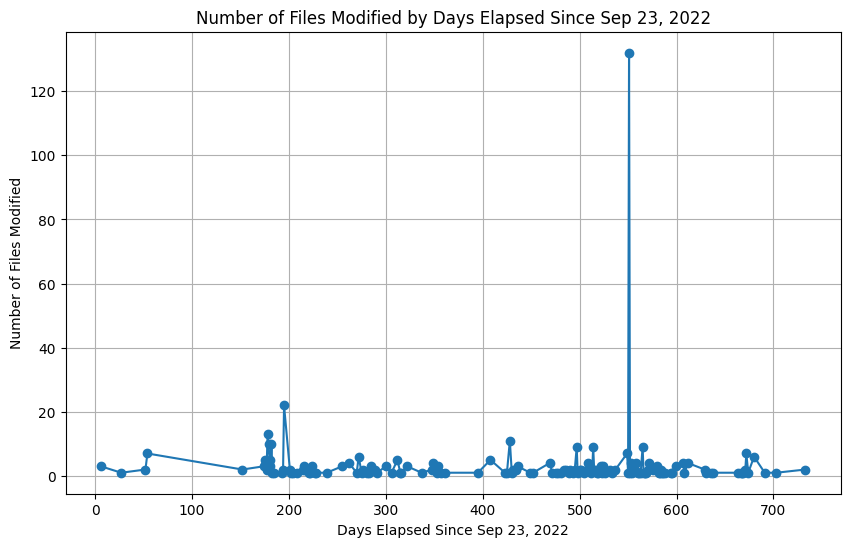

In [59]:
import matplotlib.pyplot as plt

# Filter out rows with 'safetensors' serialization format
df_safetensors = df[df['serialization_format'] == 'safetensors']

# Group by elapsed days to count files modified on each date
files_modified_by_day = df_safetensors['elapsed_days'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(files_modified_by_day.index, files_modified_by_day.values, marker='o', linestyle='-')
plt.xlabel("Days Elapsed Since Sep 23, 2022")
plt.ylabel("Number of Files Modified")
plt.title("Number of Files Modified by Days Elapsed Since Sep 23, 2022")
plt.grid(True)
plt.show()


### Analysis 2: Number of elapsed days since safetensors first appearead in a repo


In [61]:
import matplotlib.pyplot as plt

# Filter out rows with 'safetensors' serialization format
df_safetensors = df[df['serialization_format'] == 'safetensors']

# Group by elapsed days to count files modified on each date
files_modified_by_day = df_safetensors['elapsed_days'].value_counts().sort_index()

# find the lowest number of elapsed days per unique repo_url
df_safetensors_first_appearance = df_safetensors.groupby('repo_url')['elapsed_days'].min()

# 

# # plot df_safetensors_first_appearance
# plt.figure(figsize=(10, 6))
# plt.plot(df_safetensors_first_appearance.index, df_safetensors_first_appearance.values, marker='o', linestyle='-')
# plt.xlabel("Days Elapsed Since Sep 23, 2022")
# plt.ylabel("Number of Files Modified")
# plt.title("Number of Files Modified by Days Elapsed Since Sep 23, 2022")
# plt.grid(True)
# plt.show()


# Plotting
# plt.figure(figsize=(10, 6))
# plt.plot(files_modified_by_day.index, files_modified_by_day.values, marker='o', linestyle='-')
# plt.xlabel("Days Elapsed Since Sep 23, 2022")
# plt.ylabel("Number of Files Modified")
# plt.title("Number of Files Modified by Days Elapsed Since Sep 23, 2022")
# plt.grid(True)
# plt.show()


repo_url
AdharshJolly/HarryPotterBot-Model                            663
AiLab-IMCS-UL/lvbert                                         586
Ashishkr/query_wellformedness_score                          337
CAUKiel/JavaBERT                                             178
Copycats/koelectra-base-v3-generalized-sentiment-analysis    423
                                                            ... 
yoshitomo-matsubara/bert-large-uncased-mnli                  408
yoshitomo-matsubara/bert-large-uncased-mrpc                  408
yoshitomo-matsubara/bert-large-uncased-rte                   408
yoshitomo-matsubara/bert-large-uncased-sst2                  408
z-dickson/US_politicians_covid_skepticism                    449
Name: elapsed_days, Length: 412, dtype: int64

### Visualization of serialization format over the years

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Sample data
df_by_date = df[['date', 'serialization_format']]

# Convert the 'date' column to datetime and extract the year
df_by_date['date'] = pd.to_datetime(df_by_date['date'])
df_by_date.loc[:, 'year'] = df_by_date['date'].dt.year

# Group by year and serialization format, then count occurrences
grouped = df_by_date.groupby(['year', 'serialization_format']).size().unstack(fill_value=0)

# Normalize the values to 100%
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plot
fig, ax = plt.subplots(figsize=(10, 4))

# Cumulative values for stacked bars
cumulative_values = np.zeros(len(grouped_percentage))

for serialization_format in grouped_percentage.columns:
    ax.bar(grouped_percentage.index, grouped_percentage[serialization_format], 
           bottom=cumulative_values, label=serialization_format)
    cumulative_values += grouped_percentage[serialization_format]

# Add labels and title
ax.set_ylabel('Percentage')
ax.set_xlabel('Year')
ax.set_title('100% Stacked Serialization Format Distribution Over Years')
# ax.legend(title='Serialization Format')
# Move the legend outside of the plot
ax.legend(title='Serialization Format', bbox_to_anchor=(1.05, 1), loc='upper left')
# Adjust the plot layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])


plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column
df['year'] = df['date'].dt.year

# Group by year and serialization format, then count occurrences
grouped = df.groupby(['year', 'serialization_format']).size().unstack(fill_value=0)

# Normalize the values to 100%
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0) * 100

# Plot the line chart
fig, ax = plt.subplots(figsize=(10, 4)) 

# Plot lines for each serialization format
for serialization_format in grouped_percentage.columns:
    ax.plot(grouped_percentage.index, grouped_percentage[serialization_format], marker='x', label=serialization_format)

# Add labels and title
ax.set_ylabel('Percentage')
ax.set_xlabel('Year')
ax.set_title('Serialization Format Distribution Over Years')
# ax.legend(title='Serialization Format')
# Move the legend outside of the plot
ax.legend(title='Serialization Format', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the plot layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Adjust the rectangle to fit the legend

plt.show()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert the 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Extract the year from the 'date' column
df['year'] = df['date'].dt.year

# Filter out rows with 'undetermined' serialization format
filtered_df = df[df['serialization_format'] != 'undetermined']
# Group by year and serialization format, then count occurrences
grouped_counts = filtered_df.groupby(['year', 'serialization_format']).size().unstack(fill_value=0)

# Set the size of the figure (width, height)
fig, ax = plt.subplots(figsize=(10, 6))  # Adjust width and height as needed

# Plot the line chart with counts
for serialization_format in grouped_counts.columns:
    ax.plot(grouped_counts.index, grouped_counts[serialization_format], marker='o', label=serialization_format)

# Add labels and title
ax.set_ylabel('# Model Files')
ax.set_xlabel('Year')
ax.set_title('Serialization Format Totals Over Years')

# Move the legend outside of the plot
ax.legend(title='Serialization Format', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the plot layout to make room for the legend
plt.tight_layout(rect=[0, 0, 0.85, 1])

plt.show()
